# k-meansクラスタリング

In [2]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')
from sklearn.datasets import make_blobs

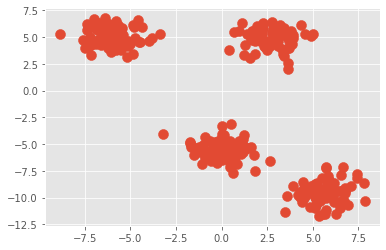

In [3]:
X, y_true = make_blobs(n_samples=300, centers=4, 
                       cluster_std=1.0, random_state=10)
plt.scatter(X[:, 0], X[:, 1], s=100);

In [6]:
import cv2
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
flags = cv2.KMEANS_RANDOM_CENTERS

In [7]:
import numpy as np
compactness, lables, centers = cv2.kmeans(X.astype(np.float32), 4, None, criteria, 10, flags)
compactness

526.6774351084605

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=labals, s=50, cmap='viridis')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5)